In [29]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
np.random.seed(1)  # for reproducibility

In [30]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [31]:
import os
from PIL import Image
import warnings

def validate_images(directory):
    corrupted_files = []
    rgba_conversion_issues = []
    
    for dirpath, _, filenames in os.walk(directory):
        print(f"Scanning directory: {dirpath}")
        
        for image_file in filenames:
            # Check for common image extensions
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image_path = os.path.join(dirpath, image_file)
                try:
                    with Image.open(image_path) as img:
                        img.verify()
                except Exception as e:
                    # Check if the exception is related to palette images with transparency
                    if "Palette images with Transparency expressed in bytes should be converted to RGBA images" in str(e):
                        # Convert the image to RGBA format
                        with warnings.catch_warnings():
                            warnings.simplefilter("ignore")
                            try:
                                rgba_image = Image.open(image_path).convert("RGBA")
                                rgba_image.save(image_path)
                                print(f"Converted {image_path} to RGBA format to resolve transparency issue.")
                            except Exception as e:
                                rgba_conversion_issues.append(image_path)
                                print(f"Error converting {image_path} to RGBA format: {e}")
                    else:
                        # If it's a different issue, add the image to the list of corrupted files
                        corrupted_files.append(image_path)
                        print(f"Error with {image_path}: {e}")
    
    return corrupted_files, rgba_conversion_issues

# Example usage:
directory = "images" 
corrupted_images, rgba_conversion_issues = validate_images(directory)

if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images.")
else:
    print("All images are valid!")

if rgba_conversion_issues:
    print(f"Found {len(rgba_conversion_issues)} images with RGBA conversion issues.")
else:
    print("No images with RGBA conversion issues.")


Scanning directory: images
Scanning directory: images/Penalty_kick
Scanning directory: images/Corner_Kick
Scanning directory: images/Free_Kick
Scanning directory: images/substitute
Scanning directory: images/Yellow_Card
Scanning directory: images/Red_Card
Scanning directory: images/tackle
All images are valid!
No images with RGBA conversion issues.


In [32]:
import os
from PIL import Image
import warnings

def validate_images(directory):
    corrupted_files = []
    
    for dirpath, _, filenames in os.walk(directory):
        print(f"Scanning directory: {dirpath}")
        
        for image_file in filenames:
            # Check for common image extensions
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image_path = os.path.join(dirpath, image_file)
                try:
                    with Image.open(image_path) as img:
                        img.verify()
                except Exception as e:
                    # Check if the exception is related to palette images with transparency
                    if "Palette images with Transparency expressed in bytes should be converted to RGBA images" in str(e):
                        # Convert the image to RGBA format
                        with warnings.catch_warnings():
                            warnings.simplefilter("ignore")
                            try:
                                rgba_image = Image.open(image_path).convert("RGBA")
                                rgba_image.save(image_path)
                                print(f"Converted {image_path} to RGBA format to resolve transparency issue.")
                            except Exception as e:
                                corrupted_files.append(image_path)
                                print(f"Error converting {image_path} to RGBA format: {e}")
                    else:
                        # If it's a different issue, add the image to the list of corrupted files
                        corrupted_files.append(image_path)
                        print(f"Error with {image_path}: {e}")
    
    return corrupted_files

# Example usage:
directory = "images" 
corrupted_images = validate_images(directory)
if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images.")
else:
    print("All images are valid!")

Scanning directory: images
Scanning directory: images/Penalty_kick
Scanning directory: images/Corner_Kick
Scanning directory: images/Free_Kick
Scanning directory: images/substitute
Scanning directory: images/Yellow_Card
Scanning directory: images/Red_Card
Scanning directory: images/tackle
All images are valid!


In [33]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) # rescale 1./255 to normalize pixel values

training_generator = image_generator.\
    flow_from_directory('Images', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    subset="training")

validation_generator = image_generator.\
    flow_from_directory('Images', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb',
    subset="validation")

Found 4775 images belonging to 7 classes.
Found 1189 images belonging to 7 classes.


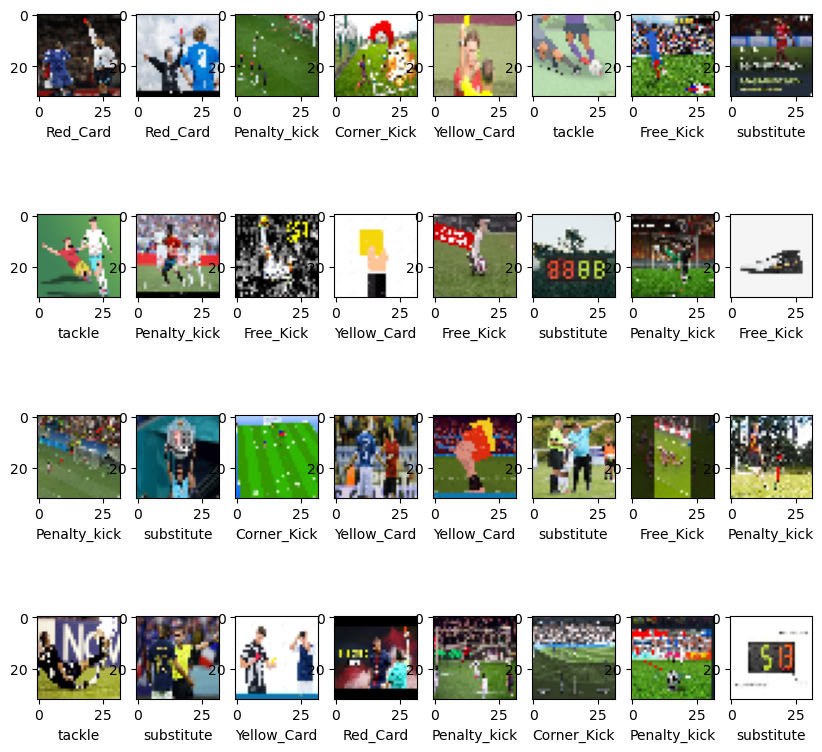

In [19]:
# Get all the classes of soccer events found in the data
soccer_event_names = training_generator.class_indices

# Get all the classes of soccer events found in the data
training_labels = list(training_generator.class_indices.keys())

# Get the first batch of images and associated labels
images, labels = training_generator[0]

# Get the size of the batch
batch_size = len(images)

# Do some calculations to accommodate the number of images (which is determined by the batch size)
cols = 8
rows = batch_size // cols

# Display the images
plt.figure(figsize=(10, 10))
for i in range(batch_size):
    plt.subplot(rows, cols, i + 1)
    # If you prefer to see images without the grid and axes labels, uncomment the following 3 lines    
    # plt.xticks([])
    # plt.yticks([])
    # plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(training_labels[int(np.argmax(labels[i]))])
plt.show()

In [20]:
# get all the classes of apples found in the data
soccer_event_names = training_generator.class_indices
print(soccer_event_names)

{'Corner_Kick': 0, 'Free_Kick': 1, 'Penalty_kick': 2, 'Red_Card': 3, 'Yellow_Card': 4, 'substitute': 5, 'tackle': 6}


In [21]:
# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())
print(training_labels)

['Corner_Kick', 'Free_Kick', 'Penalty_kick', 'Red_Card', 'Yellow_Card', 'substitute', 'tackle']


In [22]:
# get the first batch of images and associated labels
images, labels = training_generator[0]

In [23]:
print(images.shape) 

(32, 32, 32, 3)


In [24]:
print(labels) 

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [25]:
# this will take the index for the max value in each one-hot vector and return the class name
print(labels[1])
print(np.argmax(labels[1]))
print(training_labels[int(np.argmax(labels[1]))])

[0. 0. 0. 1. 0. 0. 0.]
3
Red_Card


In [26]:
model = Sequential()
# Add convolutional layer. Learn 16 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.15))

# Add convolutional layer. Learn 32 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.1))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.1))

# Add the final prediction later with 10 neurons, one for each class
model.add(Dense(7, activation='softmax'))

In [27]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
#train the model
history = model.fit(training_generator, validation_data=(validation_generator), epochs=10, verbose=1)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 51s 331ms/step - accuracy: 0.2203 - loss: 1.8789 - val_accuracy: 0.3616 - val_loss: 1.7240
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 51s 330ms/step - accuracy: 0.3781 - loss: 1.5882 - val_accuracy: 0.4138 - val_loss: 1.5739
Epoch 3/10
 43/150 ━━━━━━━━━━━━━━━━━━━━ 27s 258ms/step - accuracy: 0.4230 - loss: 1.4595

KeyboardInterrupt: 

In [ ]:
model.summary()

In [67]:
#Confusion Matrix and Classification Report
#Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# y_test is the actual labels
y_test = validation_generator.classes

#target_names = species of apples (class names)
target_names = list(training_generator.class_indices.keys())

38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 324ms/step


In [68]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

 Corner_Kick     0.5017    0.9264    0.6509       163
   Free_Kick     0.5000    0.3404    0.4051       141
Penalty_kick     0.5765    0.5385    0.5568       182
    Red_Card     0.5278    0.3631    0.4302       157
 Yellow_Card     0.8017    0.5110    0.6242       182
  substitute     0.6529    0.8103    0.7231       195
      tackle     0.6667    0.6154    0.6400       169

    accuracy                         0.5963      1189
   macro avg     0.6039    0.5864    0.5757      1189
weighted avg     0.6106    0.5963    0.5844      1189



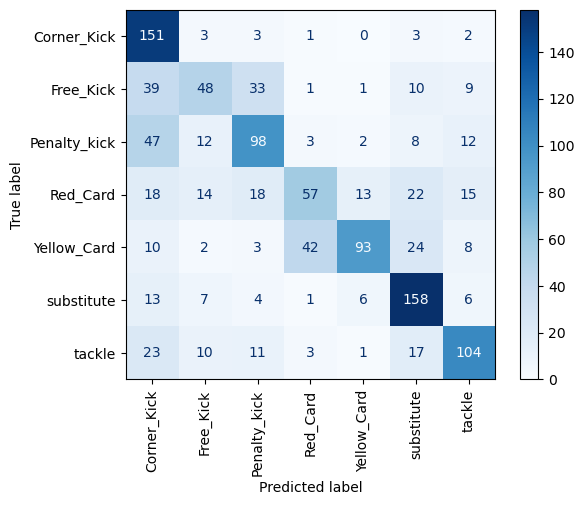

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

# display the confusion matrix
#y_test = validation_generator.classes
#y_pred = model.predict(validation_generator).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

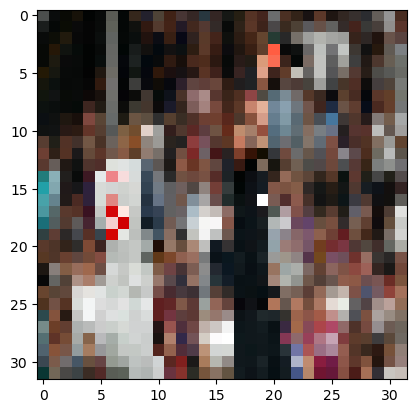

In [88]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
img = load_img(
    "/Users/rishintiwari/Desktop/Spring 2024/Data Science Programming/Final Project/images/demo4.jpg",
    color_mode='rgb',
    target_size=(32,32)
)

plt.imshow(img)

In [89]:
#Convert the image to array
single_image = img_to_array(img)

#divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

#generate preduction using our model
model.predict(img_rank4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[1.4079577e-05, 1.1971601e-03, 1.5031770e-04, 7.8190677e-03,
        1.3820289e-01, 8.5233301e-01, 2.8349468e-04]], dtype=float32)

In [90]:
#since the output above is difficult to read, let's round
np.round(model.predict(img_rank4),2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.  , 0.  , 0.  , 0.01, 0.14, 0.85, 0.  ]], dtype=float32)

In [91]:
# Now, we need to find the index where the prediction array is 1
np.argmax(model.predict(img_rank4), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([5])

In [92]:
# To get the label, we need to get the class indices from the training generator
label_map = (training_generator.class_indices)
label_map

{'Corner_Kick': 0,
 'Free_Kick': 1,
 'Penalty_kick': 2,
 'Red_Card': 3,
 'Yellow_Card': 4,
 'substitute': 5,
 'tackle': 6}

In [93]:
# Now, we can use our prediction and get the class label from the class indices:
list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


'substitute'